In [1]:
#Have learnt what is K-Nearest neighbour classification already, just try to do it from scratch
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

points = {'blue': [[2,4], [1,3], [2,3], [3,2], [2,1]],
          'orange': [[5,6], [4,5], [4,6], [6,6], [5,4]]}

new_point = [3,3]

#To now build a K-Neighbors classifier, we will create a new class.This class will have a value set 
#for k and also a method for training the model and predicting classes for new points.

class K_Nearest_Neighbors: 

    def __init__(self, k=3):  #set a default value of k (no. of neighbours)
        self.k = k

    def fit(self, points):
        self.points = points
        
    def euclidean_distance(self, p, q):
        return np.sqrt(np.sum(np.array(p) - np.array(q)) ** 2)

    def predict(self, new_point):
        distances = []

        for category in self.points:
            for point in self.points[category]:  #get the points that are classified
                distance = self.euclidean_distance(point, new_point) #find their distance with the new point
                distances.append([distance, category])

        categories = [category[1] for category in sorted(distances)[:self.k]] #find the closest 3 point in distance and determine their class (category[1])
        result = Counter(categories).most_common(1)[0][0] #count how many classes, so k have to be an odd number when there are only two classes
        return result


In [2]:
clf = K_Nearest_Neighbors(k=3)
clf.fit(points)
print(clf.predict(new_point))

blue


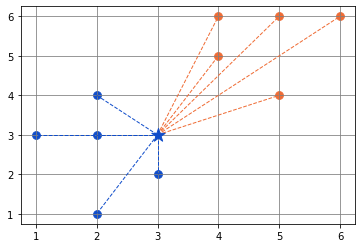

In [6]:
#Visualization and Plotting

ax = plt.subplot()
ax.grid(True, color='grey')

ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')

[ax.scatter(point[0], point[1], color='#104DCA', s=60) for point in points['blue']]
[ax.scatter(point[0], point[1], color='#EF6C35', s=60) for point in points['orange']]

new_class = clf.predict(new_point)
color = '#EF6C35' if new_class == 'orange' else '#104DCA'
ax.scatter(new_point[0], new_point[1], color=color, marker='*', s=200, zorder=100)

[ax.plot([new_point[0], point[0]], [new_point[1], point[1]], color='#104DCA', linestyle='--', linewidth=1) for point in points['blue']]
[ax.plot([new_point[0], point[0]], [new_point[1], point[1]], color='#EF6C35', linestyle='--', linewidth=1) for point in points['orange']]

plt.show()